## Logistic Map Exploration

This notebook works through some examples of graphing the logistic map. The logistic map is an equation often cited as part of the first forays of modern mathematicians and scientists into chaos theory and the foundations of complexity science. Playing with the equation and seeing how it unfolds can be really beneficial if you are hoping to build some intuition of complex processess. 

Although the logistic map is not a model of a complex system _per se_ it is an archetypal model of deterministic chaos so should help with understanding some of the behaviour these system exhibit. 

The basic equation of the logistic map is given by: 

$ x_{n+1}= \lambda x_{n}(1-x_{n})$

- $ x_{n} $: Value of x in the current step/time period
- $ x_{n+1} $: Value of x in the next step/time period
- $ \lambda $: A parameter (more on this later)

The primary motivation for the logistic map is as a model of a population where the value of $ x $ which always lies between 0 and 1 is something like the percentage of the environments carrying capacity for the population. As the population grows the $ (1 - x_{n}) $ term becomes smaller. This drives down the value of x_{n+1}. This dynamic models the way that a large population consumes mroe resources. The $ \lambda $ parameter lets us play with something like the natural fecundity of the population, the larger the parameter the more natural growth the population experiences.

Note: This is my first exploration of creating and playing with models in Python. So there may be some code messiness here. However, I'm confident that the final outputs are accurate. There are some variables that are defined near the beginning and used again in later cells so please run all the cells in the notebook if you are looking to cary something.

To put together this I followed this excellent article https://www.complexity-explorables.org/flongs/logistic/

In [2]:
#Import all the libraries used throughout the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline

#### 1 Basic Plot
The first step is to plot the logistic map and see the basic behaviour so we can start to get a feel for it. 

The most important thing to play around with here is the reproduction rate ($ \lambda $). This can vary between 0 and 4 though the values that matter to us here are between 2.4 and 4. 

As $ \lambda $ becomes greater than 3.7 chaotic behaviour starts to appear. The charts below show the evoloution from a stable fixed point (or 'attractor') when lambda equals 2.5, through a multi-stable system with two fixed points to a chaotic system at 3.7. To play with the boudary conditions you can try creating your own graphs by pasting the run_logistic_map() function at the bottom with new input variables.

Note that below I have given 0.2 as the starting condition for $ x $ this is a somewhat arbitrary choice and if you would like to experiment with different initial values you can do so by varying that value in the functions that output the graphs.

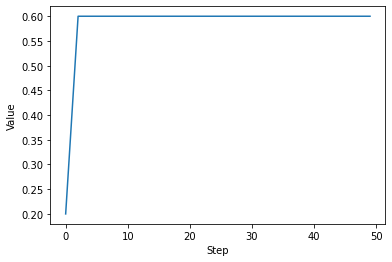

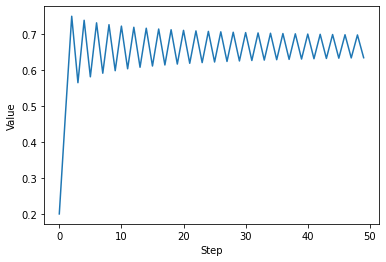

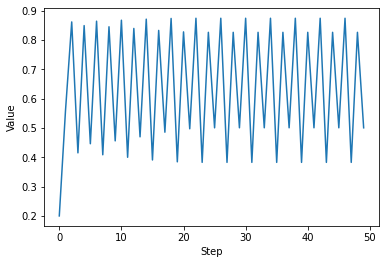

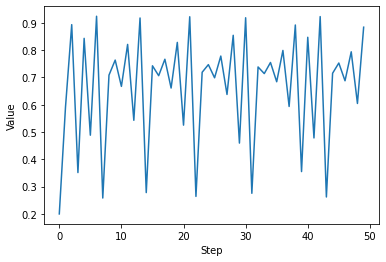

In [53]:
x = 0.2 #starting condition of x
steps = 50 #number of steps
l = 0 # starting lambda parameter

def logistic_map(x=x, l=l):
    x = l*x*(1-x) #Logistic Map Equation to determine the next step
    return x

def run_logistic_map(x=x, l=l, steps=steps, f=logistic_map):
    x_axes = []
    y_axes = []
    for i in range(steps):
        x_axes.append(i)
        y_axes.append(x)
        x = f(x,l) #Logistic Map Equation to determine the next step

    data_plot = pd.DataFrame({"Step":x_axes, "Value":y_axes})
    sns.lineplot(x = "Step", y = "Value", data=data_plot)
    plt.show()

run_logistic_map(0.2, 2.5)
run_logistic_map(0.2, 3)
run_logistic_map(0.2, 3.5)
run_logistic_map(0.2, 3.7)

#### 2 Cobweb Diagram
Next we can look at a Cobweb diagram of the logistic map. As described above the logistic map has 'attractors'. Values which operate as fixed points that the system will oscillate around until it becomes stable. A cobweb diagram lets you visualise this oscillation. 

To draw the cobweb diagram we first plot the graph of the fixed points of the system. For this we need to solve for the value of $ x $ that satisfies the logistic map $ x_{n+1} = x_{n} $ for a given lambda. That is, $ x $  such that $ x = \lambda x (1 - x) $. (In the graphs below this is the concave curve in blue) 

Once we have this we can add the piecewise development of the function from a starting $ x $ value. Draw a line from the initial value of $ x $ until it hits the curve, then find the next value of $ x $ and connect those with another set of straight lines (These are the distinctive red lines on the below graphs). Repeat. It is again particularly interesting to observe the case as the system becomes first multi-polar and then chaotic.

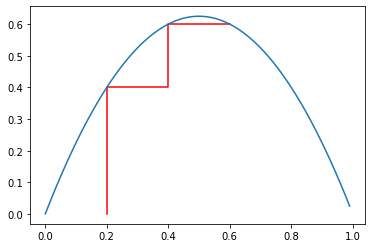

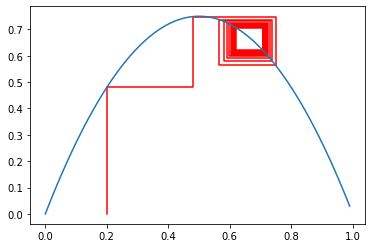

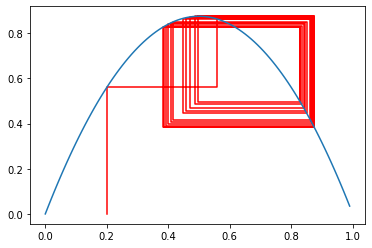

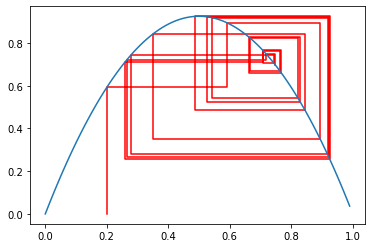

In [54]:
def cobweb_logistic_map(x=x, l=l, steps=steps, f=logistic_map):
    data = []
    x = x
    y = 0
    for i in range(steps): #Generate the cobwebs data
        if i % 2 == 0:
            data.append([x, y])
            y = f(x,l)
        else:
            data.append([x, y])
            x = f(x,l)
    
    x_axes = [x[0] for x in data]
    y_axes = [x[1] for x in data]
    
    t = np.arange(start=0, stop=1, step=.01)
    plt.plot(x_axes, y_axes, 'r') #plot the cobwebs
    plt.plot(t,f(t,l)) #plot the fixed points
    plt.show()

#Run through 
cobweb_logistic_map(0.2, 2.5)
cobweb_logistic_map(0.2, 3)
cobweb_logistic_map(0.2, 3.5)
cobweb_logistic_map(0.2, 3.7)

#### Bifurcation Diagrams
Finally let's look at a bifurcation diagram of the logistic map. These are a little hairy but once you get the idea they can also be profoundly insightful and beautiful.

With a bifurcation diagram, rather than selecting a particular value of $ \lambda $ and then seeing how the logistic map behaves we instead get a view of how the function behaves as $ \lambda $ varies. For the graph we plot $ \lambda $ along the x axis along the y axis we plot the attract for x. To generate the graph we will take a certain initial value of x and some $ \lambda $ run the logistic map for many iterations (here 10,000) then run the equation for an additional set of iterations (here 100) the value of x that are obtained in this second run are then plotted.

The graph shows the behaviour as lambda increases. First there is a single fixed point, then around 3 this splits ('bifurcates') and the system experiences "period doubling" with two fixed points. Just past a $ \lambda $ of 3.4 this happens again and we have 4 fixed points. Quickly after that however the system degenerates and we see chaotic behaviour. This is not however completely random! Again for a brief moment after a $ \lambda $ of 3.8 the system again becomes bipolar! 

Note, there are a lot of steps that are being generated here! If you change some values and rerun this notebook in can take a few seconds to load.

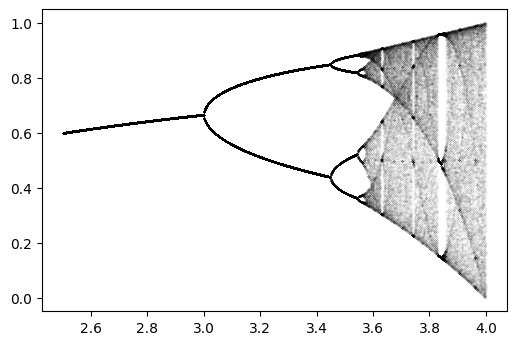

In [55]:
def bifurcation_logistic_map(x=x, f=logistic_map):
    iter_distance=0.001
    x_axes = []
    y_axes = []
    for i in np.arange(2.5,4.0,iter_distance):
        l = i
        x_axes.append(i)
        m = []
        for j in range(10000): #first 10,000 iterations to find the fixed points
            x = f(x,l)
        for k in range(100): #iterating through the fixed points/chaos
            m.append(x)
            x = f(x,l)
        y_axes.append(m)
        l += iter_distance
    
    plt.figure(dpi=100)
    plt.plot(x_axes, y_axes,'k.', alpha=0.2, markersize=0.3) #plot the cobwebs

bifurcation_logistic_map()


    

### Acknowledgements

I borrowed and learned a bunch from these pages as part of putting together this notebook
- https://www.complexity-explorables.org/flongs/logistic
- https://www.marksmath.org/classes/Fall2017ChaosAndFractals/code/cobwebs_and_bifurcations.html